<a href="https://colab.research.google.com/github/jayleecunysps/AssignmentforSPS/blob/main/W1assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ch1 Even-Odd Vending Machine

In [ ]:

def evenoddvending(number):

    if (number % 2) == 0:   #no leftover means even, else mean odd
        print('Even')

    else:
        print('Odd')
    count = 1
    while count <= 9:
        number += 2       #number add 2 no matter even or odd
        print(number)
        count += 1     # while loop to make sure count add one time in every loop until count <=9

if __name__ == '__main__':   #main will show the same color as __main__
    try:
        number = float(input('Enter an integer: '))   #direct input
        if number.is_integer():
            evenoddvending(int(number))    #going to the main code which identify if odd or even
        else:
            print('Please re-run and make sure the number is integer not float')
    except ValueError: #not int or float
        print('Please re-run and enter an invalid number, no text and symbol')



Enter an integer: 1
Odd
3
5
7
9
11
13
15
17
19


Ch3 Statistics Calculator


In [ ]:
from collections import Counter


def mean(numbers):
    s = sum(numbers)
    N = len(numbers)
    mean = s/N
    return mean


def median(numbers):
    N = len(numbers)

    numbers.sort()


    if N%2 == 0:          #means even
        m1 = N/2
        m2 = (N/2)+1
        m1 = int(m1)-1
        m2 = int(m2)-1
        median = (numbers[m1]+numbers[m2])/2
    else:
        m = (N+1)/2
        m = int(m)-1
        median = numbers[m]
    return median

def mode(numbers):
    c = Counter(numbers)
    mode = c.most_common(1)
    return mode[0][0]


def find_differences(numbers):
    m = mean(numbers)
    diff = []
    for num in numbers:
        diff.append(num - m)

    return diff


def variance_sd(numbers):
    diff = find_differences(numbers)
    squared_diff = []
    for d in diff:
        squared_diff.append(d ** 2)
    sum_squared_diff = sum(squared_diff)
    variance = sum_squared_diff / len(numbers)
    return variance, variance ** 0.5

#code above are create by book writer in ch.3  from page 73,74,63,64

def read_mydatatxt(samplefile):
    numbers = []
    with open(samplefile) as f:
        for line in f:
            numbers.append(float(line))

    return numbers

if __name__=='__main__':
    data = read_mydatatxt('mydata.txt')
    m = mean(data)
    median = median(data)
    mode = mode(data)
    variance, sd = variance_sd(data)
    print('Mean: {0:.2f}'.format(m))   #p.19
    print('Median: {0:.2f}'.format(median))
    print('Mode: {0:.2f}'.format(mode))
    print('Variance: {0:.2f}'.format(variance))
    print('Standard deviation: {0:.2f}'.format(sd))


Mean: 477.75
Median: 500.00
Mode: 100.00
Variance: 141047.35
Standard deviation: 375.56


CH5

In [ ]:
def roll(numbers_trials):
    rolls = []
    for t in range(numbers_trials):
        rolls.append(random.randint(1, 6))
    return sum(rolls) / numbers_trials


if __name__ == '__main__':
    expected_value = 3.5
    print('Expected value: {0}'.format(expected_value))
    for trial in [100, 1000, 10000, 100000, 500000]:
        avg = roll(trial)
        print('Trials: {0} Trial average {1}'.format(trial, avg))



Expected value: 3.5
Trials: 100 Trial average 3.39
Trials: 1000 Trial average 3.612
Trials: 10000 Trial average 3.4704
Trials: 100000 Trial average 3.50314
Trials: 500000 Trial average 3.499042


CH7

Enter a function in one variable: 9*x**2 + 3*x
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: .1
x: -0.166112317537704
Minimum value: -0.249997234273389


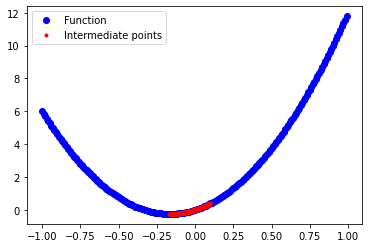

1

In [ ]:
from sympy import Derivative, Symbol, sympify, solve #library for symbolic computation Ch4
import matplotlib.pyplot as matplt  #collection of functions Ch2


def grad_descent(x0, f1x, x):
    if not solve(f1x):
        print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
        return None
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()


    X_traversed = []
    while abs(x_old - x_new) > epsilon:
        X_traversed.append(x_new)
        x_old = x_new
        x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()

    return x_new, X_traversed


def frange(start, final, interval):
    numbers = []
    while start < final:
        numbers.append(start)
        start = start + interval

    return numbers


def create_plot(X_traversed, f, var):
    x_val = frange(-1, 1, 0.01)
    f_val = [f.subs({var: x}) for x in x_val]
    matplt.plot(x_val, f_val, 'bo')
    f_traversed = [f.subs({var: x}) for x in X_traversed]
    matplt.plot(X_traversed, f_traversed, 'r.')
    matplt.legend(['Function', 'Intermediate points'], loc='best')
    matplt.show()


if __name__ == '__main__':

    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_min, X_traversed = grad_descent(var0, d, var)
        if var_min:
            print('{0}: {1}'.format(var.name, var_min))
            print('Minimum value: {0}'.format(f.subs({var: var_min})))
            create_plot(X_traversed, f, var)
1